In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file
def readCSV(df):
    data=pd.read_csv(df)
    print(data.head())
    return data

In [3]:
salesData=readCSV("Salesd.csv")

         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10


# TS data processing

In [4]:
salesData=salesData[(salesData.store==1) & (salesData.item==1)]

In [5]:
salesData.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


# Time Series Data Processing

# Setting the index

In [6]:
# Setting the index
salesData.index = pd.DatetimeIndex(salesData["date"])

In [7]:
salesData.head()

,date,store,item,sales
date,,,,
2013-01-01,2013-01-01,1,1,13
2013-01-02,2013-01-02,1,1,11
2013-01-03,2013-01-03,1,1,14
2013-01-04,2013-01-04,1,1,13
2013-01-05,2013-01-05,1,1,10


In [8]:
salesData[salesData.date=='2013-01-01']

,date,store,item,sales
date,,,,
2013-01-01,2013-01-01,1,1,13


# Dropping the columns

In [9]:
salesData.drop(['date','store','item'],axis=1,inplace=True)

In [10]:
salesData.head()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


In [11]:
salesData.shape

(1826, 1)

# Train and Test set

In [12]:
threshold = int(len(salesData)*0.9)
trainData=salesData.iloc[:threshold]
testData=salesData.iloc[threshold:]

In [13]:
trainData.shape

(1643, 1)

In [14]:
testData.shape

(183, 1)

# Time Series Visualization

In [15]:
def tsViz(data):
    
    plt.figure(figsize=(20,10))
    data.plot()
    plt.show()

### Original Data Visualization

<Figure size 1440x720 with 0 Axes>

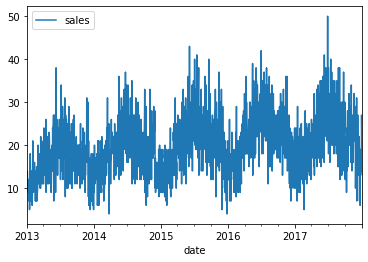

In [16]:
tsViz(salesData)

### TrainData Visualization

<Figure size 1440x720 with 0 Axes>

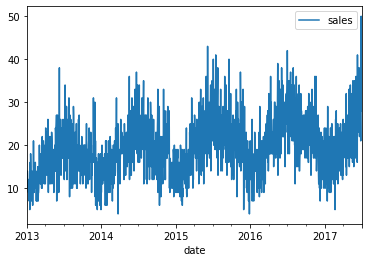

In [17]:
tsViz(trainData)

### TestData Visualization

<Figure size 1440x720 with 0 Axes>

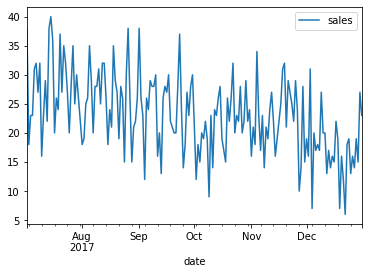

In [18]:
tsViz(testData)

# Moving Average Analysis

In [19]:
def movingAverages(data,window):
    rolling=data.rolling(window)
    rolling_mean=rolling.mean()
    print(tsViz(rolling_mean))

<Figure size 1440x720 with 0 Axes>

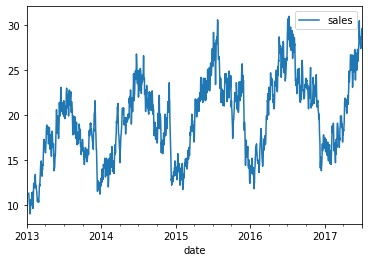

None


In [20]:
movingAverages(trainData,10)

<Figure size 1440x720 with 0 Axes>

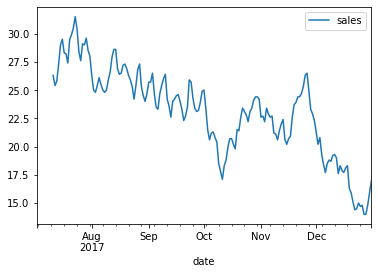

None


In [21]:
movingAverages(testData,10)

# Simple Exponential Smoothing

In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

In [23]:
start=testData.index[0]
end=testData.index[len(testData)-1]

In [24]:
resultsdict={}

In [25]:
def ses(data):
    initmethod=[None,'estimated','heuristic','legacy-heuristic']
    selectedmethod=int(input("please enter the method of initialization: "))
    model = SimpleExpSmoothing(data,initmethod[selectedmethod])
    model_fit=model.fit()
    return model_fit
def predict(model,start,end):
    predictions=model.predict(start,end)
    return predictions
def rmse(predictions,test):
    rms=np.sqrt(mean_squared_error(predictions.values,test.values))
    return rms

In [26]:
model=ses(trainData)

please enter the method of initialization: 2


C:\Users\balag\anaconda\envs\TS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [27]:
predictions=predict(model,start,end)

In [28]:
rmse(predictions,testData)

9.035533337559102

In [29]:
resultsdict['SES']=rmse(predictions,testData)

In [30]:
resultsdict

{'SES': 9.035533337559102}

# Holts Method

In [31]:
from statsmodels.tsa.holtwinters import Holt

In [32]:
def holt(data,exp,damp):
    holt=Holt(trainData,exponential=exp,damped_trend=damp,initialization_method='estimated')
    model_fit=holt.fit()
    return model_fit

In [33]:
model=holt(trainData,False,False)

C:\Users\balag\anaconda\envs\TS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [34]:
predictions=predict(model,start,end)

In [35]:
rmse(predictions,testData)

19.44771925331211

In [36]:
resultsdict['Holts Method with No exp amd No Dampend']=rmse(predictions,testData)

In [37]:
resultsdict

{'SES': 9.035533337559102,
 'Holts Method with No exp amd No Dampend': 19.44771925331211}

# Holts Winters Method

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [39]:
def hltwinters(data):
    holtWinters=ExponentialSmoothing(data,trend="additive",damped_trend=True,seasonal="additive",seasonal_periods=7,
                                     initialization_method="estimated",use_boxcox=True,)
    model_fit=holtWinters.fit()
    return model_fit

In [40]:
model=hltwinters(trainData)

C:\Users\balag\anaconda\envs\TS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [41]:
predictions=predict(model,start,end)

In [42]:
rmse(predictions,testData)

8.527007662716807

In [43]:
resultsdict['Holts winters Method with add trend,Dampend and seasonalit=7']=rmse(predictions,testData)

In [44]:
resultsdict

{'SES': 9.035533337559102,
 'Holts Method with No exp amd No Dampend': 19.44771925331211,
 'Holts winters Method with add trend,Dampend and seasonalit=7': 8.527007662716807}

# ARIMA Model

In [45]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [46]:
def adfullerTest(data,order=0):
    adFullerResults=adfuller(data)
    print("ADF test value is:",adFullerResults[0])

    print("p value is:",adFullerResults[1])

    if adFullerResults[1]<0.05:
        print("Our data is stationary")
        print(f"As Our data is Stationary,our d value=={order}")
        
    else:
        print("Our data is not stationary")
        
def diffFunction(data,order):
    data=data.diff(order)
    data.dropna(inplace=True)
    #print(f"As Our data is Stationary,our d value=={order}")
    return data

def autocorrelationplots(data):
    x=plot_acf(data)
    y=plot_pacf(data)
    return x,y
def arima(data,p,d,q):
    arima=ARIMA(data,order=(p,d,q))
    model_fit=arima.fit()
    return model_fit

In [47]:
adfullerTest(trainData)

ADF test value is: -2.3406395996771616
p value is: 0.15919557460849082
Our data is not stationary


In [48]:
adfullerTest(diffFunction(trainData,1),1)

ADF test value is: -14.697029133183692
p value is: 2.987194103692614e-27
Our data is stationary
As Our data is Stationary,our d value==1


In [49]:
dataStationary=diffFunction(trainData,1)

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

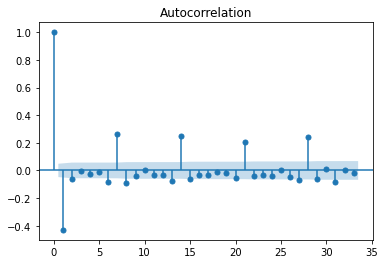

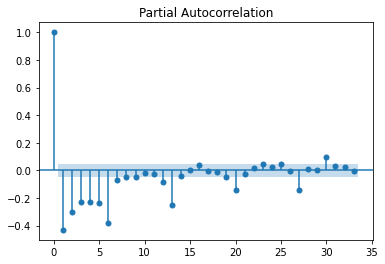

In [50]:
autocorrelationplots(dataStationary)

In [51]:
model=arima(trainData,6,1,2)
predictions=predict(model,start,end)
rmse(predictions,testData)

C:\Users\balag\anaconda\envs\TS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\balag\anaconda\envs\TS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


24.104700612857087

In [52]:
resultsdict['ARIMA']=rmse(predictions,testData)

In [53]:
resultsdict

{'SES': 9.035533337559102,
 'Holts Method with No exp amd No Dampend': 19.44771925331211,
 'Holts winters Method with add trend,Dampend and seasonalit=7': 8.527007662716807,
 'ARIMA': 24.104700612857087}

# SARIMA

In [54]:
from statsmodels.tsa.statespace import sarimax

In [60]:
def sarima(data,P,D,Q,m):
    sari = sarimax.SARIMAX(data, trend='n', order=(6,1,2), seasonal_order=(P,D,Q,m))
    model_fit=sari.fit()
    return model_fit

In [61]:
dataStationary=diffFunction(trainData,1)

In [62]:
dataSeasonal=diffFunction(dataStationary,12)

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

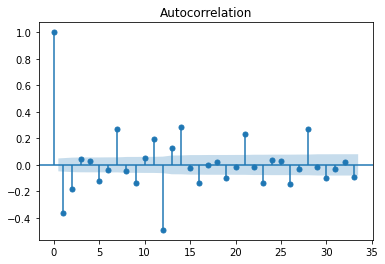

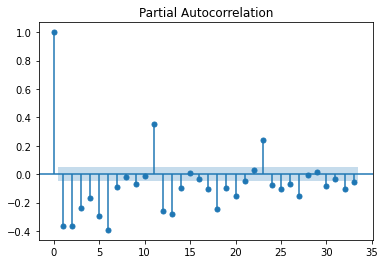

In [63]:
autocorrelationplots(dataSeasonal)

In [64]:
model=sarima(trainData,4,1,4,12)
predictions=predict(model,start,end)
rmse(predictions,testData)

C:\Users\balag\anaconda\envs\TS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\balag\anaconda\envs\TS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\balag\anaconda\envs\TS\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


10.762521416268376

In [65]:
resultsdict['SARIMA']=rmse(predictions,testData)

In [67]:
resultsdict

{'SES': 9.035533337559102,
 'Holts Method with No exp amd No Dampend': 19.44771925331211,
 'Holts winters Method with add trend,Dampend and seasonalit=7': 8.527007662716807,
 'ARIMA': 24.104700612857087,
 'SARIMA': 10.762521416268376}